<a href="https://colab.research.google.com/github/LuisIrma/pontia_prueba/blob/main/2_ESTAD%C3%8DSTICOS_B%C3%81SICOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1h6tCCKlZYAb2vZ265Ox8-zoSlSoutDBi" alt="drawing" width="150"/>

_Master en Data Analytics y Master Data Science._  
**Docente:** Luis Esteban Andaluz  
**Email:** luis_esteban_95@hotmail.es  
**Lindkedin:**  https://www.linkedin.com/in/luis-esteban-andaluz/


---



# 2 - ESTADÍSTICOS BÁSICOS JAJAJA

## Índice
* [Lectura del dataframe.](#dataframe)
* [Estadísticos de posición.](#posicion)
  * [Media / mean](#media)
  * [Media ponderada / weighted mean](#media_ponderada)
  * [Mediana / median](#mediana)
  * [Percentil / Percentile](#percentil)
  * [Mediana ponderada / weighted median](#mediana_ponderda)
  * [Media truncada / trimmed mean](#mediana_ponderda)
* [Estadísticos de variación.](#variacion)
  * [Desviación / deviation](#desviacion)
  * [Varianza / variance](#varianza)
  * [Desviación estándar / Standard deviation](#desviacion_estandar)
  * [Desviación absoluta media / Mean absolute deviation](#desviacion_media)
  * [Desviación mediana respecto a la mediana / Median absolute deviation from the median](#mediana_ponderda)
  * [Rango / range](#rango)
  * [Estadística de órden / order statistics](#order)
  * [Estimaciones basadas en percentiles](#rango_intercuartilico)
* [Ejercicios](#Ejercicios)

## Lectura del dataframe <a class="anchor" id="dataframe"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/PONTIA - ESTADÍSTICA/1_modulo_matematico/2022_forbes_billionaires.csv")
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [ ]:
df.tail()

,Unnamed: 0,rank,name,networth,age,country,source,industry
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail
2599,2599,2578,Horst-Otto Gerberding,$1 B,69,Germany,flavors and fragrances,Food & Beverage


In [ ]:
df["networth_numeric"] = df["networth"].apply(lambda x: x.replace("$","").replace("B", "")).astype(float)

In [ ]:
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry,networth_numeric
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive,219.0
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology,171.0
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail,158.0
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology,129.0
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments,118.0


##  Estadísticos de posición <a class="anchor" id="posicion"></a>

Los estadísticos de posición son aquellos que nos permiten dar una estimación del valor típico de la distribución de la variable. Hay que tener en cuenta que cuando trabajamos con datos una columna puede tener varios miles de valores diferentes y necesitamos alguna medida que nos permita saber dónde se concentran la mayoría de los datos.




### Media <a class="anchor" id="media"></a>
La media es el valor promedio. Lo calculamos como la suma de todos los valores de la distribución dividido por el número de valores.


<img src="https://drive.google.com/uc?id=1uuQXTWE5-EVOR3Td66b2TINuFP_UjPFc" alt="drawing" width="350"/>




In [ ]:
print("Edad media")
round(df["age"].mean(),2)

Edad media


64.27

In [ ]:
print("Riqueza media (Billion $)")
round(df["networth_numeric"].mean(),2)

Riqueza media (Billion $)


4.86

### Media ponderada<a class="anchor" id="media_ponderada"></a>

La media ponderada se obtiene al multiplicar cada valor de la distribución por un peso específico y después dividiendo por la suma de todos los pesos.

Esta métrica es útil para "disminuir" o "aumentar" el impacto de ciertas observaciones que, por su naturaleza, son menos precisas o más imprecisas. Por ejemplo, si estamos procesando datos que obtenemos de un sensor querremos que los valores de los sensores más precisos influyan más que los menos precisos.

También puede servirnos para mitigar posibles defectos en la muestra. Si por ejemplo tenemos dos públicos de los cuales uno está sobrerepresentado quizá queremos utilizar los pesos para disminuir su peso y buscar el equilibrio.

<img src="https://drive.google.com/uc?id=1FKhojcU53J1arnyRuI2pu35LBOjjKWyG" alt="drawing" width="400"/>


In [ ]:
print("Veamos cuál es la edad media ponderando por la riqueza")
round( (df["age"]*df["networth_numeric"]).sum()/ df["networth_numeric"].sum(),2)

Veamos cuál es la edad media ponderando por la riqueza


65.43

In [ ]:
# Utilizando numpy
import numpy as np
round( np.average(df["age"], weights=df["networth_numeric"]),2)

65.43

### Mediana<a class="anchor" id="mediana"></a>

La mediana es la observación que se encuentra en la posición del centro al ordenar los datos de la distribución. En muchos casos, la mediana es un mejor estimador de la localización de la distribución ya que es menos sensible a posibles datos extremos que desvirtuarian la medida. Por ejemplo, con la riqueza de las personas más ricas del mundo, unas pocas personas tienen muchos más Billion que los demás y esto desplaza la media, sin embargo la mediana nos dará más sensibilidad sobre qué riqueza tiene la mayoría de los multimillonarios de Forbes.

In [ ]:
print("Mediana de la riqueza (B $)")
print(df["networth_numeric"].median())

Mediana de la riqueza (B $)
2.4


In [ ]:
print("Mediana de la edad")
print(df["age"].median())

Mediana de la edad
64.0


### Percentil
Los percentiles son una medida que nos indica la observación que ocupa cierta posición en los datos ordenados. La posición la indicamos con porcentaje, por ejemplo, qué dato ocupa la posición del 12%, el 62% o cualquier otro. Algunos percentiles tienen nombre especiales. Los cuartiles son los datos que ocupan la posición del 25%, 50% y 75%, además, el percentil 50% el la mediana.

In [ ]:
print("Diferentes percentiles de la distribución de la riqueza")
df["networth_numeric"].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999, 0.9999])

Diferentes percentiles de la distribución de la riqueza


0.1000      1.2000
0.2500      1.5000
0.5000      2.4000
0.7500      4.5000
0.9000      8.4000
0.9500     14.0000
0.9900     47.3190
0.9950     74.8320
0.9990    140.6290
0.9999    206.5248
Name: networth_numeric, dtype: float64

In [ ]:
print("Diferentes percentiles de la distribución de la riqueza")
df["age"].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999, 0.9999])

Diferentes percentiles de la distribución de la riqueza


0.1000    48.0000
0.2500    55.0000
0.5000    64.0000
0.7500    74.0000
0.9000    81.0000
0.9500    86.0000
0.9900    94.0000
0.9950    95.0000
0.9990    98.0000
0.9999    99.4802
Name: age, dtype: float64

### Mediana ponderada
Siguiendo la intuición detrás de la media ponderada, podemos, en vez de quedarnos con la observación del medio de la serie de datos utilizar los pesos para escoger la observación que separa la muestra en dos mitades cuyas sumas de peso resultan iguales.

In [ ]:
# utilizando wquantiles
!pip install wquantiles
import wquantiles

In [ ]:
round( wquantiles.median(df["age"], weights=df["networth_numeric"]),2)

65.0

### Media truncada
La media truncada se calcula como la media de los datos inferiores a cierta cota superior y superiores a cierta cota inferior. Esta medida nos ofrece un valor de media robusto ya que elimina los datos más extremos que podrían desvirturar la media.

In [ ]:
print("Media truncada")
cota_inf = df["networth_numeric"].quantile([0.1]).iloc[0]
cota_sup = df["networth_numeric"].quantile([0.9]).iloc[0]
round(df.loc[(df["networth_numeric"] > cota_inf )& (df["networth_numeric"] < cota_sup), "networth_numeric"].mean(),2)

Media truncada


3.01

In [ ]:
# utilizando scipy
from scipy.stats import trim_mean
round(trim_mean(df["networth_numeric"], 0.1),2)

3.0

In [ ]:
from scipy.stats import trim_mean

In [ ]:
trim_mean?

### Datos robustos y outliers

Los outliers o datos atípicos son aquellos que se encuentran muy deslocalizados con respecto a los datos habituales de la distribución. Los outliers pueden desvirtuar nuestras medidas, como por ejemplo la media. Si la medida se ve afectada entonces esta no es robusta mientras que si sí lo es, como la media, hablamos de una medida robusta.

Es muy importante entender el origen de los outliers, ¿puede tratarse de un valor centinela que indica un error? ¿está representando una situación que se aleja mucho de la tónica general y por tanto no interesa?  ¿se ha producido un error?

Los outliers pueden tratarse estadísticamente o aplicar criterios de negocio para eliminarlos. En cualquier caso, lo ideal es tenerlos siempre analizados.

<Axes: >

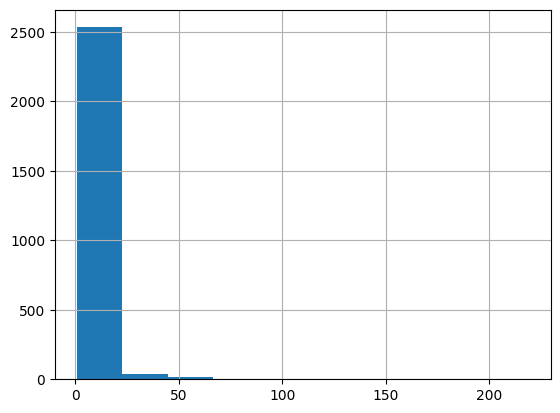

In [ ]:
df["networth_numeric"].hist()

<Axes: >

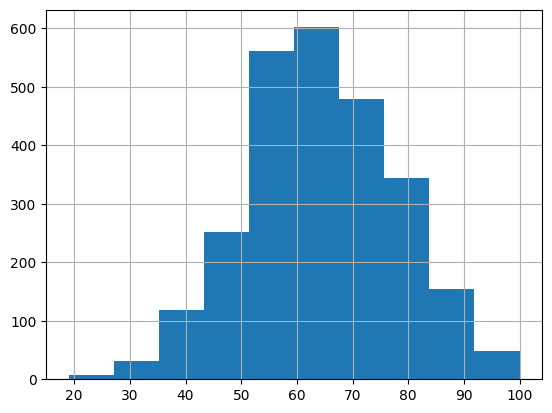

In [ ]:
df["age"].hist()

## Estadísticos de variación<a class="anchor" id="variacion"></a>

### Desviación
Para cualquier observación podemos calcular cuánto se desvia con respecto al estadístico de posición de la distribución que elijamos. Esta métrica nos da información de cómo de dispersa se encuentra la observación con respecto al valor central. No obstante, no es práctico para saber de un vistazo cómo de dispersos están los datos.




In [ ]:
data = np.array([1, 2, 3, 4])
media = np.mean(data)
print(media)
desviacion = data - media

print(desviacion)

2.5
[-1.5 -0.5  0.5  1.5]


In [ ]:
np.mean(desviacion)

0.0

### Varianza
La estimación más común de la variabilidad es la varianza y la desviación estándar. Ambas se basan en los cuadrados de las desviaciones, la varianza es la media de las desviaciones al cuadrado.


<img src="https://drive.google.com/uc?id=16a-bnPRrDNYBLmog7IUMOR0AeGZf9Y14" alt="drawing" width="450"/>


In [ ]:
round(df["networth_numeric"].var(ddof=0),2)

113.58

In [ ]:
round(np.var(df["networth_numeric"]),2)

113.58

In [ ]:
round(np.var(data),2)

1.25

In [ ]:
round(df["age"].var(ddof=0),2)

### Desviación estándar
<img src="https://drive.google.com/uc?id=1kfTmVza3kifNc7Ismir6gm41llhUzhUH" alt="drawing" width="450"/>

In [ ]:
round(df["networth_numeric"].std(),2)

10.66

In [ ]:
round(df["networth_numeric"].mean(),2)

4.86

In [ ]:
df["networth_numeric"].std() / df["networth_numeric"].mean()

2.1930094499045323

In [ ]:
round(df["age"].std(),2)

13.22

In [ ]:
round(df["age"].mean(),2)

64.27

In [ ]:
df["age"].std() / df["age"].mean()

0.20569800740709301

In [ ]:
(10.66/4.86) * 100

219.3415637860082

In [ ]:
(13.22/64.27) * 100

20.56947253773145

In [ ]:
df["networth_numeric"].hist(bins=30)

In [ ]:
df["age"].hist(bins=30)

In [ ]:
round(np.std(df["networth_numeric"]),2)

### Desviación absoluta media
Una buena medida de la variabilidad es la estimación del valor típico de las desviaciones. Como hacer simplemente la media no nos daría mucha información ya que la combinación de desviaciones negativas anularian las desviaciones positivas, un acercamiento más simple consiste en tomar la media de los valores absolutos de las desviaciones.

<img src="https://drive.google.com/uc?id=19SviCTZxyE2Cs4sdpolJMBqphXshAbTo" alt="drawing" width="450"/>

In [ ]:
round(df["networth_numeric"].mad(), 2)

<ipython-input-35-ea3ef7487c0a>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  round(df["networth_numeric"].mad(), 2)


4.07

In [ ]:
(df["networth_numeric"] - df["networth_numeric"].mean()).abs().mean()

4.073085576923076

### Desviación mediana respecto a la mediana
Para obtener un estimador robusto de variabilidad podemos utilizar la mediana de las diferencias absolutas entre las observaciones y la mediana.

<img src="https://drive.google.com/uc?id=1t2wDAAuVTxZqziZhH8vXRNp1E6w8_ErF" alt="drawing" width="600"/>

In [ ]:
from scipy.stats import median_abs_deviation
round(median_abs_deviation(df["networth_numeric"]), 2)

1.0

### Estadísticos de órden
En ocasiones, para entender las desviaciones resulta útil centrarse en las observaciones que ocupan cierta posición ordenada dentro de la distribución y como de separadas se encuentran las mismas al ordendarse. Vamos a ver el rango y las estimaciones basadas en percentiles.

#### Rango
El rango es la diferencia entre el mayor y el menor valor de la distribución. Esta medida, en relación a los estimadores de posición y a los de desviación puede ayudarnos a entender mejor cómo se distribuyen los datos y si tenemos outliers.

In [ ]:
rango = df["networth_numeric"].max() - df["networth_numeric"].min()
print(rango)
print(round(df["networth_numeric"].mean(), 2))
print(df["networth_numeric"].median())

218.0
4.86
2.4


#### Estimaciones basadas en percentiles
Ya hemos definido, en la sección de estadísticos de posición, los percentiles. Si medimos la distancia que existe entre ellos podemos tener medidas de la dispersión y desviación de la muestra. El cálculo más típcico es es IQR o rango intercuartílico que es la diferencia entre el percentil 0.75 y el 0.25.

Este valor, el IQR, nos puede ayudar a filtrar automáticamente los outliers. Resulta típico establecer un parámetro de filtrado,f , que puede ser 1.5, 3 (tipicamente) o más y filtrar todos aquellos valores que queden por encima de la mediana más f veces el rango intercuartílico y por debajo de la mediana menos f veces el rango intercuartílico.

El cálculo de los percentiles es computacionalmente muy costoso y cuando tenemos grandes datasets el cálculo suele ser aproximado. En cualquier caso, estos métodos aproximados no suelen ser un problema.

In [ ]:
IQR = df["networth_numeric"].quantile(0.75) - df["networth_numeric"].quantile(0.25)

In [ ]:
print(IQR)
print([df["networth_numeric"].median() - 3*IQR, df["networth_numeric"].median() + 3*IQR])

3.0
[-6.6, 11.4]


In [ ]:
df["networth_numeric"].hist(bins=25)

In [ ]:
df["age"].hist(bins=25)

In [ ]:
(df["age"].std()/df["age"].mean())*100

In [ ]:
df.head()

### Ejercicios
* #####  Para este dataset ¿qué estadístico de posición y desviación describen mejor la distribución de las variables edad "age" y riqueza neta "networth_numeric"

* ¿Qué multimillonarios se quedarían fuera de los cálculos si aplicaramos un filtro estadístico de outliers en la variable networth_numeric de 1.5 veces el rango intercuartílico? ¿Y si fuera de 3 veces? ¿Crees que desvirtuan lo suficiente la distribución como para eliminarlos? ¿Tenemos el mismo problema con la edad?